# Actividad 03 - Perceptrón: Aprendiendo el concepto de Sobrepeso

**Centro Universitario de Ciencias Exactas e Ingenierías**\
**Materia** Inteligencia artificial 2\
**Nombre:** Mejia Blanco Erick\
**Código:** 211408613

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Algoritmo del perceptron

In [24]:
def perceptron(x, y, w, b, eta, epochs, samples):
    correct = 0
    iters = 0
    y_pred = 0
    z = None
    while correct is not samples and iters < epochs:
        correct = 0
        iters += 1
        for i in range(samples):
            # Prediction
            z = (w.conj().T @ x[:,i] + b).sum()
            if z > 0:
                y_pred = 1
            else:
                y_pred = 0
            #training
            if y[i] == y_pred:
                correct += 1
            else:
                w = w + (eta * (y[i] - y_pred) * x[:, i].reshape(2,1))
                b = b + eta * (y[i] - y_pred)
    print('iteraciones', iters, 'correctos', correct)
    return [w, b]

### Funcion para escalar datos

In [25]:
def scale(x):
    return [(x_i - np.mean(x_i))/np.std(x) for x_i in x]
    # return [(x_i - np.min(x_i))/(np.max(x_i)-np.min(x_i)) for x_i in x]

In [26]:
samples = 75
epochs = 1000
min_weigth = 40
max_weigth = 150
min_heigth = 100
max_heigth = 200
weigths = min_weigth + (max_weigth - min_weigth) * np.random.rand(samples)
heigths = min_heigth + (max_heigth - min_heigth) * np.random.rand(samples)
# x = np.column_stack((weigths, heigths))
# x
x = np.array([weigths, heigths])
x

array([[ 86.53466536,  53.24225919, 119.07781791, 110.84549053,
         49.56204789,  72.47621984, 108.1347924 ,  55.54027926,
        148.21546527,  99.14217637,  83.59106784,  64.00158448,
         72.66997366, 128.49928017,  52.90948634, 113.44805863,
         91.10997265, 115.52116807, 129.53330611, 122.16074192,
        108.68747868, 117.21561849, 130.72025   , 135.13176775,
        136.68026594, 135.79607647, 123.52461977, 112.29994042,
         78.82819062,  68.19204605,  84.86049559, 107.24510621,
        149.89027699,  43.60368756, 121.79729234,  80.98463161,
        142.99278463, 116.46789947,  51.23487086,  71.12596516,
        105.07962049, 130.97302188, 121.69132517,  61.56410936,
         66.50732987,  74.5268556 , 125.85828803,  70.78661605,
        123.64746751,  48.17478603,  71.868807  , 105.90820316,
        123.1082307 ,  50.211622  , 110.86140821,  78.69056967,
        103.44113195,  46.09704856,  59.01927996,  44.71749742,
         89.7327318 ,  60.55521834,  93.

In [27]:
# y = np.array([1 if (person[0]/((person[1]/100)**2)) < 25 else -1 for person in x])
y = np.array([1 if (person[0]/((person[1]/100)**2)) > 25 else 0 for person in x.T])
y

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
w_weigths = min_weigth + (max_weigth - min_weigth) * np.random.rand()
w_heigths = min_heigth + (max_heigth - min_heigth) * np.random.rand()
w = np.array([[w_weigths], [w_heigths]])
w

array([[ 48.42648122],
       [100.66885649]])

In [29]:
b = 0 + (100 - 0) * np.random.rand()
b

7.643134209887192

In [30]:
eta = 0.5
eta

0.5

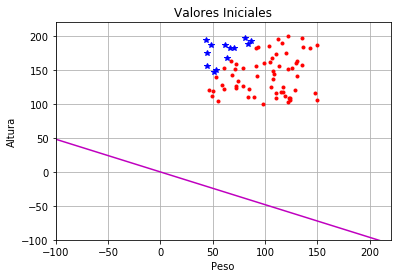

In [31]:
plt.title("Valores Iniciales")
plt.grid(True)
# plt.plot(x, '.r')
# plt.plot(x[0],x[1],'.r')
plt.plot(x[0][y == 0], x[1][y == 0], '*b')
plt.plot(x[0][y == 1], x[1][y == 1], '.r')
plt.plot([-100,220],[(-w[0]/w[1])*(-100)-(b/w[1]),(-w[0]/w[1])*(220)-(b/w[0])],'-m')
plt.xlim(-100, 220)
plt.ylim(-100, 220)
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.show()

In [32]:
# w_res, b_res = perceptron(x.T,y,w,b,eta,1000, samples)
w_res, b_res = perceptron(x,y,w,b,eta,epochs, samples)

iteraciones 1000 correctos 70


In [33]:
w_res

array([[ 911.47660171],
       [-312.44419389]])

In [34]:
b_res

507.6431342098872

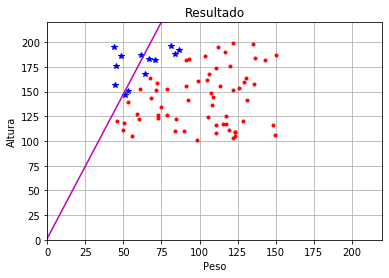

In [35]:
plt.title("Resultado")
plt.grid(True)
# plt.plot(x,'.r')
# plt.plot(x[0],x[1], '.r')
plt.plot(x[0][y == 0], x[1][y == 0], '*b')
plt.plot(x[0][y == 1], x[1][y == 1], '.r')
plt.plot([0,220],[(-w_res[0]/w_res[1])*(0)-(b_res/w_res[1]),(-w_res[0]/w_res[1])*(220)-(b_res/w_res[1])],'-m')
plt.xlim(0, 220)
plt.ylim(0, 220)
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.show()

# Datos escalados

In [36]:
x = np.array(scale(x))
x

array([[-0.2036766 , -1.03166981,  0.60568242,  0.40094171, -1.12319788,
        -0.55331481,  0.33352574, -0.97451728,  1.3303454 ,  0.10987639,
        -0.27688485, -0.76408181, -0.54849609,  0.83999732, -1.03994598,
         0.46566844, -0.08988718,  0.51722736,  0.86571389,  0.68235577,
         0.34727123,  0.55936891,  0.89523358,  1.00494949,  1.04346116,
         1.02147107,  0.71627587,  0.43711436, -0.39533919, -0.65986364,
        -0.24531376,  0.31139895,  1.37199853, -1.27138429,  0.67331666,
        -0.34170778,  1.2004556 ,  0.54077289, -1.08159422, -0.58689609,
         0.2575426 ,  0.9015201 ,  0.67068122, -0.82470263, -0.70176309,
        -0.50231482,  0.77431497, -0.59533582,  0.71933113, -1.15769955,
        -0.56842137,  0.27814973,  0.70592013, -1.10704276,  0.40133758,
        -0.39876186,  0.21679285, -1.20937357, -0.88799338, -1.24368347,
        -0.12413962, -0.84979408, -0.03547832, -0.83358308,  0.56688355,
        -1.23786073, -0.27174846,  1.37395769, -0.6

In [37]:
# Model Parameters
# w = -1 + 2 * np.random.rand(2, 1)
# w

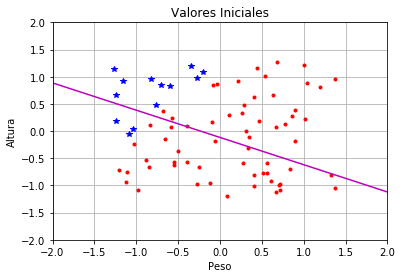

In [38]:
plt.title("Valores Iniciales")
plt.grid(True)
# plt.plot(x, '.r')
# plt.plot(x[0],x[1],'.r')
plt.plot(x[0][y == 0], x[1][y == 0], '*b')
plt.plot(x[0][y == 1], x[1][y == 1], '.r')
plt.plot([-2, 2],[(-w[0]/w[1])*(-2)-(b/w[1]),(-w[0]/w[1])*(2)-(b/w[0])],'-m')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.show()

In [39]:
# w_res, b_res = perceptron(x.T,y,w,b,eta,1000, samples)
w_res, b_res = perceptron(x,y,w,b,eta,epochs, samples)

iteraciones 27 correctos 75


In [40]:
w_res

array([[ 33.88540049],
       [-23.98756681]])

In [41]:
b_res

32.643134209887194

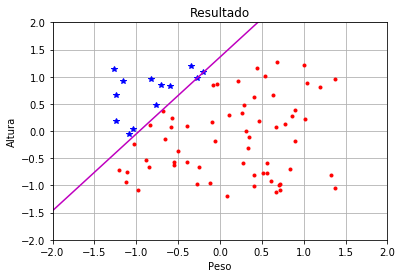

In [42]:
plt.title("Resultado")
plt.grid(True)
# plt.plot(x,'.r')
# plt.plot(x[0],x[1], '.r')
plt.plot(x[0][y == 0], x[1][y == 0], '*b')
plt.plot(x[0][y == 1], x[1][y == 1], '.r')
plt.plot([-2,2],[(-w_res[0]/w_res[1])*(-2)-(b_res/w_res[1]),(-w_res[0]/w_res[1])*(2)-(b_res/w_res[1])],'-m')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.show()

### Segunda Prueba de datos escalados

In [55]:
samples = 120
epochs = 1000
min_weigth = 40
max_weigth = 200
min_heigth = 80
max_heigth = 220
weigths = min_weigth + (max_weigth - min_weigth) * np.random.rand(samples)
heigths = min_heigth + (max_heigth - min_heigth) * np.random.rand(samples)
# x = np.column_stack((weigths, heigths))
# x
x = np.array([weigths, heigths])
x

array([[114.85929814, 117.70202386, 188.05834048, 136.34520394,
         98.32961146, 149.45435924, 183.40185841, 107.94019855,
        112.47106998, 193.41910885, 124.57450153,  44.49086095,
        123.7256544 , 132.74924169,  86.13360577, 167.11792553,
        147.64793089, 142.74569109,  73.20911451,  80.03174765,
        148.94665173, 163.90673973, 160.32270129, 150.3058831 ,
        195.81841547, 119.71703009, 193.28374673, 176.56687697,
         64.11155202,  50.5454386 ,  71.69627293,  67.57940872,
         65.78173225,  86.44277703, 142.1714963 , 107.69542258,
        112.95245925,  54.96856283,  94.75446842, 193.37556362,
        122.34070334,  78.50977376, 113.68339946, 153.62830061,
         71.63912686, 178.28354571,  50.61258239,  65.35072889,
        122.95877991, 149.12836709, 118.51052725, 178.63862821,
         57.50511435, 138.30189941, 182.1817285 , 143.689647  ,
        115.43934822, 147.71877238, 174.73331733,  88.17778092,
        169.35100122,  74.59649641, 115.

In [56]:
x = np.array(scale(x))
x

array([[-1.52263696e-01, -8.78499558e-02,  1.50636417e+00,
         3.34588604e-01, -5.26812298e-01,  6.31630882e-01,
         1.40085226e+00, -3.09044591e-01, -2.06378909e-01,
         1.62783461e+00,  6.78745266e-02, -1.74675247e+00,
         4.86403746e-02,  2.53107166e-01, -8.03163385e-01,
         1.03187223e+00,  5.90698756e-01,  4.79618184e-01,
        -1.09602133e+00, -9.41426285e-01,  6.20126663e-01,
         9.59109498e-01,  8.77898243e-01,  6.50925687e-01,
         1.68220085e+00, -4.21916331e-02,  1.62476742e+00,
         1.24597741e+00, -1.30216434e+00, -1.60956090e+00,
        -1.13030103e+00, -1.22358566e+00, -1.26431948e+00,
        -7.96157828e-01,  4.66607420e-01, -3.14591006e-01,
        -1.95471039e-01, -1.50933668e+00, -6.07821990e-01,
         1.62684791e+00,  1.72585649e-02, -9.75912916e-01,
        -1.78908557e-01,  7.26208834e-01, -1.13159591e+00,
         1.28487566e+00, -1.60803948e+00, -1.27408565e+00,
         3.12636528e-02,  6.24244178e-01, -6.95299584e-0

In [57]:
# y = np.array([1 if (person[0]/((person[1]/100)**2)) < 25 else -1 for person in x])
y = np.array([1 if (person[0]/((person[1]/100)**2)) > 25 else 0 for person in x.T])
y

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [58]:
w_weigths = min_weigth + (max_weigth - min_weigth) * np.random.rand()
w_heigths = min_heigth + (max_heigth - min_heigth) * np.random.rand()
w = np.array([[w_weigths], [w_heigths]])
w

array([[177.52234928],
       [155.39792644]])

In [64]:
b = 0 + (200 - 0) * np.random.rand()
b

126.30405742113649

In [47]:
eta = 0.5
eta

0.5

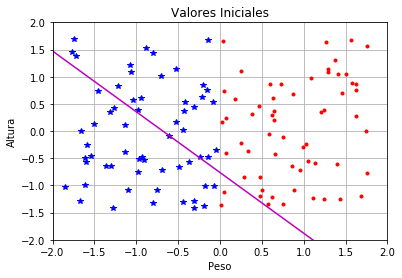

In [65]:
plt.title("Valores Iniciales")
plt.grid(True)
# plt.plot(x, '.r')
# plt.plot(x[0],x[1],'.r')
plt.plot(x[0][y == 0], x[1][y == 0], '*b')
plt.plot(x[0][y == 1], x[1][y == 1], '.r')
plt.plot([-2, 2],[(-w[0]/w[1])*(-2)-(b/w[1]),(-w[0]/w[1])*(2)-(b/w[0])],'-m')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.show()

In [66]:
# w_res, b_res = perceptron(x.T,y,w,b,eta,1000, samples)
w_res, b_res = perceptron(x,y,w,b,eta,epochs, samples)

iteraciones 36 correctos 120


In [67]:
w_res

array([[225.54091721],
       [ 11.44102941]])

In [68]:
b_res

12.804057421136491

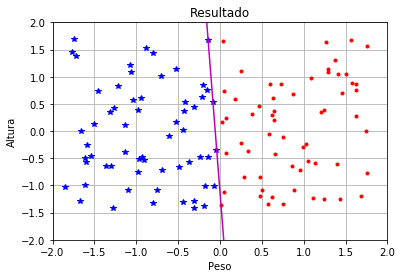

In [69]:
plt.title("Resultado")
plt.grid(True)
# plt.plot(x,'.r')
# plt.plot(x[0],x[1], '.r')
plt.plot(x[0][y == 0], x[1][y == 0], '*b')
plt.plot(x[0][y == 1], x[1][y == 1], '.r')
plt.plot([-2,2],[(-w_res[0]/w_res[1])*(-2)-(b_res/w_res[1]),(-w_res[0]/w_res[1])*(2)-(b_res/w_res[1])],'-m')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.show()